### Get Threads

In [1]:
# scraping a discussion forum using requests and xpath to extract data:
# https://debatepolitics.com/forums/2024-us-presidential-election.227/
# 2024 US Presidential Election

import requests
from lxml import html

# link to the discussion forum
url = 'https://debatepolitics.com/forums/2024-us-presidential-election.227/'
# request the link
page = requests.get(url)
# parse the html
tree = html.fromstring(page.content)    # Converts the HTML content into a structured tree format, allowing you to navigate and extract specific elements using XPath.

page.status_code

200

In [3]:
# extract titles of all articles on the page:
titles = tree.xpath('//div[@class="structItem-title"]/a/text()')
titles = [title.strip() for title in titles]
titles

['For some Latinos, ‘prosperity gospel’ led them to Trump',
 'How the GOP is on Self-Destruct',
 "Kamala's Been On A Drinking Binge Since Losing",
 'The Victory',
 'It Must Really Suck For You People',
 'Manifestly Unfit',
 "Poll: 65% of Canadians agree with Trump's wish to make them the 51st state",
 'President Trump - Meet the Press... "No I will not do any executive orders to limit abortion"',
 "Trumps fake campaign promises are falling like dominoes or cut like a drug dealer's cocaine. Election fraud is consequential & criminal.",
 "TRUMP RENEGES ON THE USMCA - HIS OWN ADMINISTRATION'S TRADE AGREEMENT NEGOTIATED & SIGNED IN 2020",
 "Trump's inaugural fund receives $1 million donation from Mark Zuckerberg's Meta",
 'Now It’s Panama’s Turn In the Barrel',
 'You know its very hard. LOL',
 "Western Kentucky Professor: Trump's victory signals that human decency is no longer an American virtue",
 'Fetterman slams legal cases against Trump, Hunter Biden in first Truth Social post: ‘Cases 

In [5]:
# extract urls of the titles
urls = tree.xpath('//div[@class="structItem-title"]/a/@href')
urls = [url.strip() for url in urls]
urls

['/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/',
 '/threads/how-the-gop-is-on-self-destruct.557954/',
 '/threads/kamalas-been-on-a-drinking-binge-since-losing.556181/',
 '/threads/the-victory.554963/',
 '/threads/it-must-really-suck-for-you-people.557448/',
 '/threads/manifestly-unfit.557682/',
 '/threads/poll-65-of-canadians-agree-with-trumps-wish-to-make-them-the-51st-state.557506/',
 '/threads/president-trump-meet-the-press-no-i-will-not-do-any-executive-orders-to-limit-abortion.556927/',
 '/threads/trumps-fake-campaign-promises-are-falling-like-dominoes-or-cut-like-a-drug-dealers-cocaine-election-fraud-is-consequential-criminal.557303/',
 '/threads/trump-reneges-on-the-usmca-his-own-administrations-trade-agreement-negotiated-signed-in-2020.557839/',
 '/threads/trumps-inaugural-fund-receives-1-million-donation-from-mark-zuckerbergs-meta.557111/',
 '/threads/now-it%E2%80%99s-panama%E2%80%99s-turn-in-the-barrel.557723/',
 '/threads/you-know-i

In [7]:
# add the base url to the urls:
urls = ['https://debatepolitics.com' + url for url in urls]
urls

['https://debatepolitics.com/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/',
 'https://debatepolitics.com/threads/how-the-gop-is-on-self-destruct.557954/',
 'https://debatepolitics.com/threads/kamalas-been-on-a-drinking-binge-since-losing.556181/',
 'https://debatepolitics.com/threads/the-victory.554963/',
 'https://debatepolitics.com/threads/it-must-really-suck-for-you-people.557448/',
 'https://debatepolitics.com/threads/manifestly-unfit.557682/',
 'https://debatepolitics.com/threads/poll-65-of-canadians-agree-with-trumps-wish-to-make-them-the-51st-state.557506/',
 'https://debatepolitics.com/threads/president-trump-meet-the-press-no-i-will-not-do-any-executive-orders-to-limit-abortion.556927/',
 'https://debatepolitics.com/threads/trumps-fake-campaign-promises-are-falling-like-dominoes-or-cut-like-a-drug-dealers-cocaine-election-fraud-is-consequential-criminal.557303/',
 'https://debatepolitics.com/threads/trump-reneges-on-the-usmca-his-own-a

In [9]:
# extract number of replies:
replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[1]/dd/text()')
# replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[@class="pairs pairs--justified"]/dd/text()')
replies = [reply.strip() for reply in replies]

# convert replies to numbers:
replies = [int(reply) for reply in replies]
replies

[48,
 2,
 187,
 182,
 290,
 129,
 56,
 72,
 36,
 12,
 54,
 133,
 281,
 363,
 85,
 29,
 81,
 53,
 32,
 41]

In [11]:
# extract number of views:
views = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[2]/dd/text()')
views = [view.strip() for view in views]
views

['2K',
 '174',
 '2K',
 '2K',
 '2K',
 '1K',
 '774',
 '937',
 '587',
 '298',
 '533',
 '2K',
 '2K',
 '3K',
 '872',
 '331',
 '749',
 '532',
 '484',
 '455']

In [13]:
# replace K with 1000:
views = [int(view.replace('K', '000')) for view in views]
views

[2000,
 174,
 2000,
 2000,
 2000,
 1000,
 774,
 937,
 587,
 298,
 533,
 2000,
 2000,
 3000,
 872,
 331,
 749,
 532,
 484,
 455]

In [15]:
# put them into a dataframe:
import pandas as pd
df = pd.DataFrame({'title': titles, 'url': urls, 'replies': replies, 'views':views})
df.head()

,title,url,replies,views
0,"For some Latinos, ‘prosperity gospel’ led them...",https://debatepolitics.com/threads/for-some-la...,48,2000
1,How the GOP is on Self-Destruct,https://debatepolitics.com/threads/how-the-gop...,2,174
2,Kamala's Been On A Drinking Binge Since Losing,https://debatepolitics.com/threads/kamalas-bee...,187,2000
3,The Victory,https://debatepolitics.com/threads/the-victory...,182,2000
4,It Must Really Suck For You People,https://debatepolitics.com/threads/it-must-rea...,290,2000


### Putting All Together and Pagination

In [18]:
# define a function to get thread data:
def get_threads(url):
    tree = html.fromstring(requests.get(url).content)
    titles = tree.xpath('//div[@class="structItem-title"]/a/text()')
    urls = ['https://debatepolitics.com' + url for url in tree.xpath('//div[@class="structItem-title"]/a/@href')]
    replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[1]/dd/text()')
    replies = [reply.strip() for reply in replies]
    replies = [int(reply.replace('K', '000')) for reply in replies]
    views = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[2]/dd/text()')
    views = [view.strip() for view in views]
    views = [int(view.replace('K', '000')) for view in views]
    return pd.DataFrame({'title': titles, 'url': urls, 'replies': replies, 'views':views})

In [20]:
# Using the function to get more than 10 pages:
threads = pd.DataFrame(columns=['title','url','replies','views'])
for i in range(1, 11):
    url = 'https://debatepolitics.com/forums/2024-us-presidential-election.227/page-'+str(i)
    threads = pd.concat([threads, get_threads(url)], ignore_index=True)
threads.head()

# This example is actually a special case, because it follows the pattern of page-1, page-2, page-3, which can be relatively easily coded.  

,title,url,replies,views
0,"For some Latinos, ‘prosperity gospel’ led them...",https://debatepolitics.com/threads/for-some-la...,48,2000
1,How the GOP is on Self-Destruct,https://debatepolitics.com/threads/how-the-gop...,2,174
2,Kamala's Been On A Drinking Binge Since Losing,https://debatepolitics.com/threads/kamalas-bee...,187,2000
3,The Victory,https://debatepolitics.com/threads/the-victory...,182,2000
4,It Must Really Suck For You People,https://debatepolitics.com/threads/it-must-rea...,290,2000


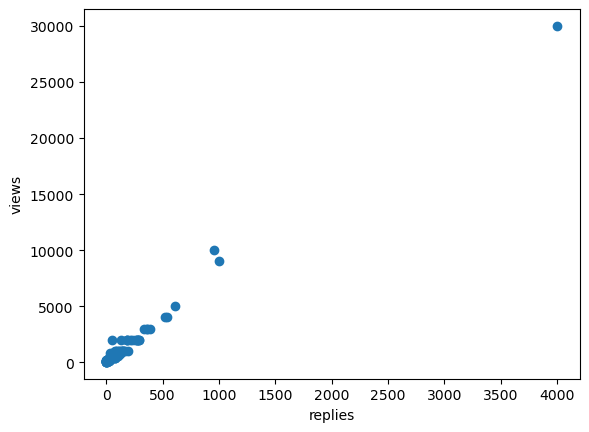

In [21]:
# using matplotlib to plot the data:
import matplotlib.pyplot as plt
plt.scatter(threads['replies'], threads['views'])
plt.xlabel('replies')
plt.ylabel('views')
plt.show()

In [24]:
threads.to_csv('/Users/kaiyang/Desktop/threads.csv', index=False)

### Get Comments

In [27]:
# get urls from the dataframe:
urls = threads['url'].tolist()
urls[:5]

['https://debatepolitics.com/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/',
 'https://debatepolitics.com/threads/how-the-gop-is-on-self-destruct.557954/',
 'https://debatepolitics.com/threads/kamalas-been-on-a-drinking-binge-since-losing.556181/',
 'https://debatepolitics.com/threads/the-victory.554963/',
 'https://debatepolitics.com/threads/it-must-really-suck-for-you-people.557448/']

In [29]:
page = requests.get(urls[0])
tree = html.fromstring(page.content)

In [31]:
# get author names
author = tree.xpath('//article/@data-author')    
author = [author.strip() for author in author]
author

["j brown's body",
 'ataraxia',
 'Peacenik',
 'countryboy',
 'JMB1911A1',
 'dmpi',
 'Slartibartfast',
 'Slartibartfast',
 'anatta',
 "j brown's body",
 'Lisa',
 'uptower',
 'JMB1911A1',
 'Lisa',
 'reinaert',
 'countryboy',
 'KingLeo',
 'countryboy',
 'Lisa',
 'KingLeo',
 'SavannahMann',
 'Phys251',
 'Geoist',
 'Geoist',
 'Along Came Jones']

In [33]:
# get author political leanning:
# pol = tree.xpath('//article//dl[@data-field="political_leaning"]/dd/text()')
pls = tree.xpath('//article//div[@class="message-userExtras"]')
pol = []
for i in range(len(pls)):
  x = pls[i].xpath('dl[@data-field="political_leaning"]/dd/text()')
  if len(x) == 0:
    pol.append(None)
  else:
    pol.append(x[0])
pol

['Progressive',
 'Liberal',
 'Progressive',
 'Conservative',
 'Private',
 'Conservative',
 'Liberal',
 'Liberal',
 'Undisclosed',
 'Progressive',
 'Progressive',
 'Other',
 'Private',
 'Progressive',
 None,
 'Conservative',
 'Independent',
 'Conservative',
 'Progressive',
 'Independent',
 'Moderate',
 'Slightly Liberal',
 'Libertarian - Left',
 'Libertarian - Left',
 'Centrist']

In [35]:
# get the author's gender:
genders = tree.xpath('//article//div[@class="message-userExtras"]')
gender = []
for i in range(len(genders)):
  x = genders[i].xpath('dl[@data-field="gender"]/dd/text()')
  if len(x) == 0:
    gender.append(None)
  else:
    gender.append(x[0])
gender

['Male',
 'Male',
 None,
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 None,
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male']

In [37]:
# find the next page url if any:
next = tree.xpath('//div[@class="pageNav  "]/a/@href')
# add base to next:
next = 'https://debatepolitics.com' + next[0]
next

'https://debatepolitics.com/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/page-2'

### Putting All Together

In [40]:
# Put all together in a functionn to get comments:
def get_comments(url):
    res = pd.DataFrame(columns=['url', 'author', 'pol', 'gender'])
    while True:
        tree = html.fromstring(requests.get(url).content)
        author = tree.xpath('//article/@data-author')
        author = [author.strip() for author in author]
        pls = tree.xpath('//article//div[@class="message-userExtras"]')
        pol = []
        for i in range(len(pls)):
          x = pls[i].xpath('dl[@data-field="political_leaning"]/dd/text()')
          if len(x) == 0:
            pol.append(None)
          else:
            pol.append(x[0])
        genders = tree.xpath('//article//div[@class="message-userExtras"]')
        gender = []
        for i in range(len(genders)):
          x = genders[i].xpath('dl[@data-field="gender"]/dd/text()')
          if len(x) == 0:
            gender.append(None)
          else:
            gender.append(x[0])

        res = pd.concat([res, pd.DataFrame({'url': url, 'author': author, 'pol': pol, 'gender': gender})],
                        ignore_index=True)

        next = tree.xpath('//div[@class="pageNav  "]/a/@href')
        if next:
            url = 'https://debatepolitics.com' + next[0]
        else:
            break
    return res

In [ ]:
d = get_comments(urls[0])
d.head()

In [ ]:
for url in urls:
    d = get_comments(url)
    d.to_csv('/Users/kaiyang/Desktop/comments.csv', mode='a', header=False, index=False)

In [ ]:
comments = pd.read_csv('/Users/kaiyang/Desktop/comments.csv', names=['url', 'author', 'pol', 'gender'])
comments.head()

In [ ]:
# delete duplicate rows by author:
comments = comments.drop_duplicates(subset='author')
comments.head()

In [ ]:
# matplotlib distribution frequency of political leanings:
comments['pol'].value_counts().plot(kind='bar')
plt.xlabel('Political Leanings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# cross tab of gender and political leanings:
pd.crosstab(comments['gender'], comments['pol'])